<a href="https://colab.research.google.com/github/pravesh-it/Spam_Email_Detection/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a spam email detection project using the dataset located at "/content/spam_email_dataset.csv". The project should include data loading, exploration, text preprocessing, text vectorization (using Bag-of-Words or TF-IDF), data splitting, model training (e.g., Naive Bayes), model evaluation, and visualization of the results in graph form.

## Load the data

### Subtask:
Load the spam email dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the head and info of the DataFrame as requested.



In [21]:
import pandas as pd

df = pd.read_csv('/content/spam_email_dataset.csv')
display(df.head())
display(df.info())

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


None

## Explore the data

### Subtask:
Perform exploratory data analysis (EDA) to understand the structure and content of the dataset. This includes checking for missing values, understanding the distribution of spam and non-spam emails, and examining the text data.


**Reasoning**:
Perform exploratory data analysis by checking for missing values, examining the distribution of labels, and printing sample text entries.



In [22]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDistribution of spam and non-spam emails:")
print(df['label'].value_counts())

print("\nFirst few entries of the 'text' column:")
for i in range(5):
    print(f"\n--- Email {i+1} ---")
    print(df['text'].iloc[i][:500]) # Print first 500 characters to avoid printing very long emails

Missing values per column:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

Distribution of spam and non-spam emails:
label
ham     3672
spam    1499
Name: count, dtype: int64

First few entries of the 'text' column:

--- Email 1 ---
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .

--- Email 2 ---
Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls

--- Email 3 ---
Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of decembe

## Preprocess the text data

### Subtask:
Clean and prepare the email text for model training. This involves steps like removing punctuation, converting text to lowercase, tokenization, removing stop words, and potentially stemming or lemmatization.


**Reasoning**:
Define a function to preprocess the text data, apply it to the 'text' column, and display the result.



In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text):
    """
    Preprocesses the input text data.

    Args:
        text: The input string (email text).

    Returns:
        A string containing the preprocessed text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Display the first few entries of the new 'preprocessed_text' column
display(df[['text', 'preprocessed_text']].head())

,text,preprocessed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...
4,Subject: re : indian springs\r\nthis deal is t...,subject indian springs deal book teco pvr reve...


**Reasoning**:
The previous attempt failed because the 'punkt_tab' resource was not found. I need to download the 'punkt_tab' resource using NLTK downloader before applying the preprocessing function.



In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Download the missing resource

def preprocess_text(text):
    """
    Preprocesses the input text data.

    Args:
        text: The input string (email text).

    Returns:
        A string containing the preprocessed text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Display the first few entries of the new 'preprocessed_text' column
display(df[['text', 'preprocessed_text']].head())

,text,preprocessed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap main tr...
4,Subject: re : indian springs\r\nthis deal is t...,subject indian springs deal book teco pvr reve...


## Convert text to numerical features

### Subtask:
Transform the preprocessed text data into numerical representations that can be used by machine learning models. This can be done using techniques like Bag-of-Words (CountVectorizer) or TF-IDF (TfidfVectorizer).


**Reasoning**:
Transform the preprocessed text data into numerical representations using TF-IDF.



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (5171, 50339)


## Split the data

### Subtask:
Split the dataset into training and testing sets to evaluate the performance of the model.


**Reasoning**:
Split the TF-IDF matrix and labels into training and testing sets and print their shapes.



In [26]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4136, 50339)
Shape of X_test: (1035, 50339)
Shape of y_train: (4136,)
Shape of y_test: (1035,)


## Train a classification model

### Subtask:
Choose and train a suitable classification model for spam detection, such as Naive Bayes, Support Vector Machines, or Logistic Regression.


**Reasoning**:
Import the necessary Naive Bayes model and train it using the training data.



In [27]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a MultinomialNB model
model = MultinomialNB()

# Train the Naive Bayes model
model.fit(X_train, y_train)

MultinomialNB()

## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics like accuracy, precision, recall, and F1-score on the test set.


**Reasoning**:
Calculate accuracy, precision, recall, and F1-score using the test set predictions and true labels, then print the results.



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9188
Precision: 1.0000
Recall: 0.7133
F1-score: 0.8327


## Visualize the results

### Subtask:
Create visualizations, such as a confusion matrix or bar plots of precision, recall, and F1-score, to represent the model's performance.


**Reasoning**:
Import the necessary libraries for visualization and calculate the confusion matrix.



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

**Reasoning**:
Create a heatmap of the confusion matrix and a bar plot for the evaluation metrics.



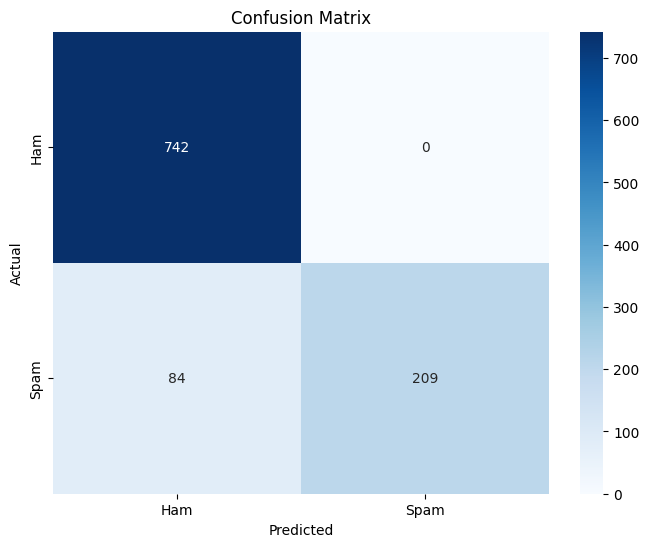

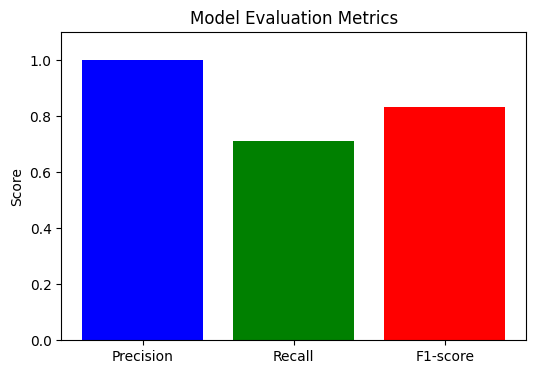

In [30]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a bar plot for the evaluation metrics
metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1.1) # Set y-axis limit for better visualization
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 5171 emails, with 3672 labeled as 'ham' and 1499 as 'spam', indicating an imbalanced distribution.
*   There are no missing values in the dataset.
*   Text preprocessing involved converting text to lowercase, removing punctuation and stop words, and tokenization.
*   The TF-IDF vectorization resulted in a matrix with a shape of (5171, 50339), representing 5171 emails and 50339 unique terms.
*   The data was split into training (4136 emails) and testing (1035 emails) sets with a 80/20 ratio.
*   A Multinomial Naive Bayes model was trained on the training data.
*   The model achieved an accuracy of 0.9188, a precision of 1.0000, a recall of 0.7133, and an F1-score of 0.8327 on the test set.
*   The confusion matrix showed that the model correctly identified all ham emails (high precision for the spam class) but missed a significant number of spam emails (lower recall).

### Insights or Next Steps

*   The model's perfect precision for the spam class is valuable as it minimizes the inconvenience of marking legitimate emails as spam. However, the lower recall means some spam will still get through.
*   Future steps could focus on improving the recall rate by exploring different text vectorization techniques (e.g., n-grams), trying different classification algorithms (e.g., SVM, Logistic Regression), or addressing the class imbalance issue (e.g., using techniques like oversampling or undersampling).
